When running `Stage 1 - Frame Generation and KP Feature Extraction`, the extraction function sometimes runs into errors when running OpenPose on an image frame. During project development, these boiled down to two types of failures: the first where OpenPose fails to recognize the person in the image, and the second where it is simply a bug in the `pytorch-openpose` implementation. 

This notebook displays the two errors using example frames. 

In [1]:
# basic essential libraries
import matplotlib.pyplot as plt
import numpy as np
import os

# libraries for displaying images and videos
import cv2
import copy
from IPython.display import HTML
import io
import base64

# pose estimation library
from pytorch_openpose.src import model
from pytorch_openpose.src import util
from pytorch_openpose.src.body import Body

## Failure Type 1: Missed Person Detection

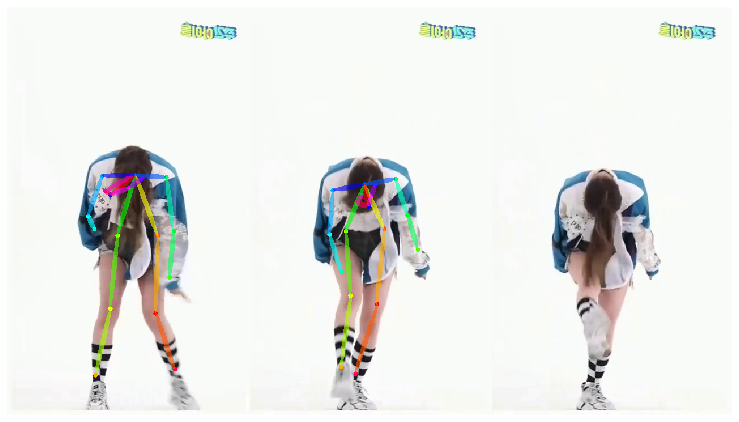

In [2]:
# Import model
body_estimation = Body('pytorch_openpose/model/body_pose_model.pth')

# Import image
test_image = 'images/frame17.jpg' # seg3_1_4, video 1
oriImg = cv2.imread(test_image)  # B,G,R order

# Body Estimation
candidate, subset = body_estimation(oriImg) # add %timeit at the start to time
# Execution Time: 8.89 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Draw results on another image
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

fig, axes = plt.subplots(1,1, figsize=(15,7.5))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## Failure Type 2: Internal Pytorch Implementation Error

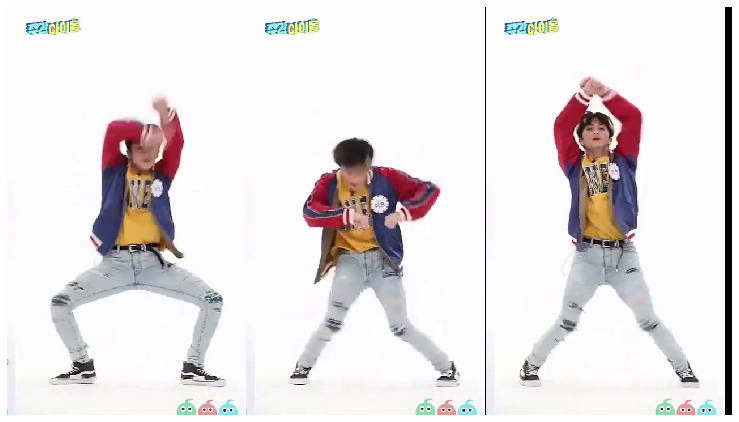

ZeroDivisionError: float division by zero

In [6]:
# Import image
test_image = 'images/frame12_failure.jpg' 
oriImg = cv2.imread(test_image)  # B,G,R order

import matplotlib.image as mpimg
img = mpimg.imread(test_image)
fig, axes = plt.subplots(1,1, figsize=(15,7.5))
plt.imshow(img)
plt.axis('off')
plt.show()

# Body Estimation
candidate, subset = body_estimation(oriImg) # add %timeit at the start to time
# Execution Time: 8.89 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Draw results on another image
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

fig, axes = plt.subplots(1,1, figsize=(15,7.5))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()